# MODELIZACIÓN REGRESION LOSS GIVEN DEFAULT

## IMPORTAR PAQUETES

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [3]:
ruta_proyecto = 'C:/Users/alvar/Proyectos ML/03_RIESGOS'

Nombres de los ficheros de datos.

In [4]:
nombre = 'df_tablon_lgd.pickle'

Cargar los datos.

In [5]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre)

## CREAR X e Y

In [6]:
x = df.drop(columns='target_lgd')
y = df.target_lgd

## MODELIZAR

### Reservar el dataset de validacion

In [7]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [8]:
pipe = Pipeline([('algoritmo',Ridge())])

grid = [      
        {'algoritmo': [Ridge()],
         'algoritmo__alpha': list(np.arange(0.1,1.1,0.1))},
        
        {'algoritmo': [Lasso()],
         'algoritmo__alpha': list(np.arange(0.1,1.1,0.1))},
    
        {'algoritmo': [HistGradientBoostingRegressor(min_samples_leaf = 100, scoring = 'neg_mean_absolute_percentage_error')],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

####  Con grid search

In [9]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'neg_mean_absolute_error',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

In [10]:
salida = pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score').reset_index(drop=True).head(10)
salida

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__alpha,param_algoritmo__l2_regularization,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.05,0.05,1.23,0.03,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.00,0.10,20.00,200.00,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.37,-0.37,-0.37,-0.37,0.00,1
1,7.06,0.05,1.15,0.01,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.00,0.10,10.00,200.00,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.37,-0.38,-0.37,-0.37,0.00,2
2,7.47,0.20,1.10,0.01,HistGradientBoostingRegressor(min_samples_leaf...,NaN,1.00,0.10,10.00,200.00,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.37,-0.38,-0.37,-0.37,0.00,3
3,7.84,0.29,1.23,0.06,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.75,0.10,10.00,200.00,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.37,-0.38,-0.37,-0.37,0.00,4
4,7.54,0.32,1.20,0.05,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.75,0.10,20.00,200.00,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.37,-0.37,-0.37,-0.37,0.00,5
5,7.22,0.06,1.16,0.02,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.25,0.10,10.00,200.00,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.37,-0.38,-0.37,-0.37,0.00,6
6,7.74,0.32,1.21,0.03,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.50,0.10,20.00,200.00,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.37,-0.38,-0.37,-0.37,0.00,7
7,5.44,0.66,0.86,0.08,HistGradientBoostingRegressor(min_samples_leaf...,NaN,1.00,0.10,20.00,200.00,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.37,-0.37,-0.38,-0.37,0.00,8
8,7.60,0.13,1.31,0.09,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.50,0.10,10.00,200.00,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.37,-0.37,-0.38,-0.37,0.00,9
9,6.95,0.20,1.14,0.04,HistGradientBoostingRegressor(min_samples_leaf...,NaN,0.25,0.10,20.00,200.00,{'algoritmo': HistGradientBoostingRegressor(mi...,-0.37,-0.38,-0.38,-0.37,0.00,10


In [11]:
modelo_lgd = HistGradientBoostingRegressor(learning_rate = 0.1,
                                          max_iter = 200,
                                          max_depth = 20,
                                          min_samples_leaf = 100,
                                          scoring = 'neg_mean_absolute_percentage_error',
                                          l2_regularization = 0.25)
modelo_lgd.fit(train_x,train_y)

HistGradientBoostingRegressor(l2_regularization=0.25, max_depth=20,
                              max_iter=200, min_samples_leaf=100,
                              scoring='neg_mean_absolute_percentage_error')

## EVALUAR

### Predecir sobre validación

In [12]:
pred = modelo_lgd.predict(val_x)

Corregimos los máximos y mínimos.

In [13]:
pred = np.where(pred < 0, 0, pred)
pred = np.where(pred > 1, 1, pred)

### Evaluar sobre validación

In [14]:
mean_absolute_error(val_y, pred)

0.3722468210281263

## REPORTING DEL MODELO

In [15]:
check_validacion = pd.DataFrame({'lgd_real':val_y, 'lgd_pred':pred})
check_validacion

,lgd_real,lgd_pred
id_cliente,,
88876324,1.00,0.46
137313150,1.00,0.72
125825901,1.00,0.75
10109140,0.00,0.18
137529597,1.00,0.79
...,...,...
23946118,0.00,0.66
124959237,1.00,0.73
120037181,0.00,0.60


In [16]:
check_validacion.corr()

,lgd_real,lgd_pred
lgd_real,1.00,0.53
lgd_pred,0.53,1.00


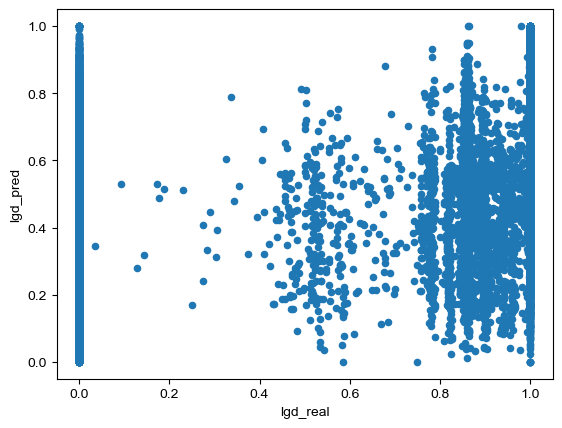

In [21]:
check_validacion.plot.scatter(x='lgd_real',y='lgd_pred');

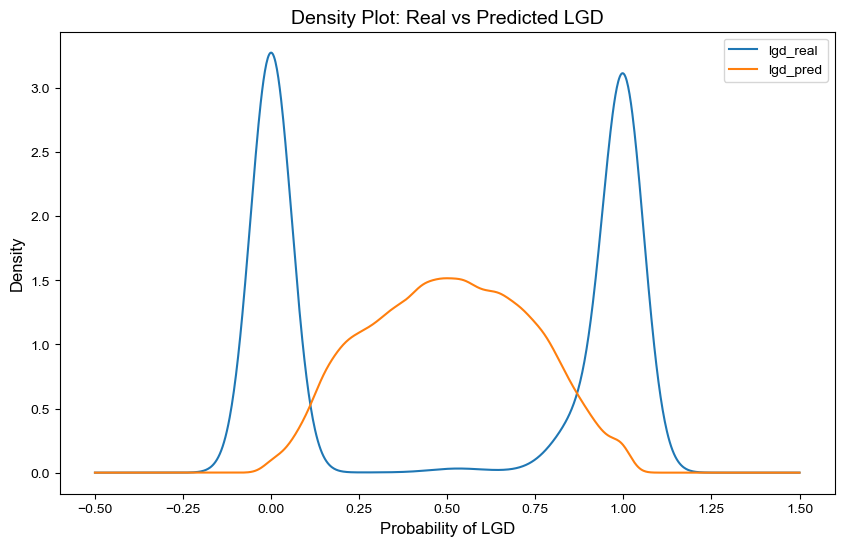

In [27]:
import matplotlib.pyplot as plt

# Crear el gráfico de densidad
check_validacion.plot.density(figsize=(10, 6), alpha=1)

# Agregar título y etiquetas
plt.title('Density Plot: Real vs Predicted LGD', fontsize=14)
plt.xlabel('Probability of LGD', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Mostrar el gráfico
plt.show()
